In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE  # Sınıf dengesizliği için

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()  # Bilgisayardan CSV dosyalarını seçip yükle


Saving TSLA.csv to TSLA.csv


In [3]:
for file_name in uploaded.keys():
    print(file_name)


TSLA.csv


In [4]:
df = pd.read_csv('TSLA.csv')  # Buraya kendi seçtiğin dosya adını yaz
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,301.540009,6654900
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,304.179993,8375200
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,279.179993,13872000
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,257.779999,21001400
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,266.130005,15170700


In [5]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
None
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df = df.dropna()  # Son satırda NaN olacak çünkü shift var
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,301.540009,6654900,1
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,304.179993,8375200,0
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,279.179993,13872000,0
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,257.779999,21001400,1
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,266.130005,15170700,0


In [13]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Gerekirse başka sütunlar eklenebilir
y = df['Target']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
print("Eğitim setindeki pozitif/negatif oranı:")
print(pd.Series(y_train).value_counts())


Eğitim setindeki pozitif/negatif oranı:
Target
0    91
1    84
Name: count, dtype: int64


In [17]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("SMOTE sonrası pozitif/negatif oranı:")
print(pd.Series(y_train_sm).value_counts())


SMOTE sonrası pozitif/negatif oranı:
Target
1    91
0    91
Name: count, dtype: int64


In [18]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}


In [19]:
for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_prob is not None:
        print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 40)


--- Logistic Regression ---
Accuracy: 0.4605263157894737
Precision: 0.45454545454545453
Recall: 0.5405405405405406
F1 Score: 0.49382716049382713
ROC AUC: 0.5086625086625087

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.38      0.42        39
           1       0.45      0.54      0.49        37

    accuracy                           0.46        76
   macro avg       0.46      0.46      0.46        76
weighted avg       0.46      0.46      0.46        76

----------------------------------------
--- Decision Tree ---
Accuracy: 0.5921052631578947
Precision: 0.5789473684210527
Recall: 0.5945945945945946
F1 Score: 0.5866666666666667
ROC AUC: 0.5921690921690922

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.59      0.60        39
           1       0.58      0.59      0.59        37

    accuracy                           0.59        76
   macro avg       0.59   

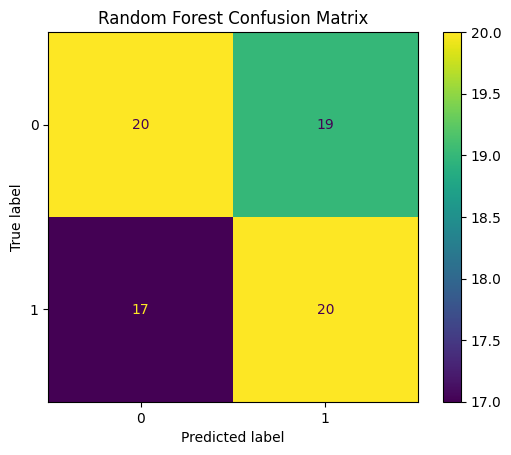

In [20]:
# Örneğin Random Forest için Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

rf = models['Random Forest']
y_pred_rf = rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest Confusion Matrix")
plt.show()


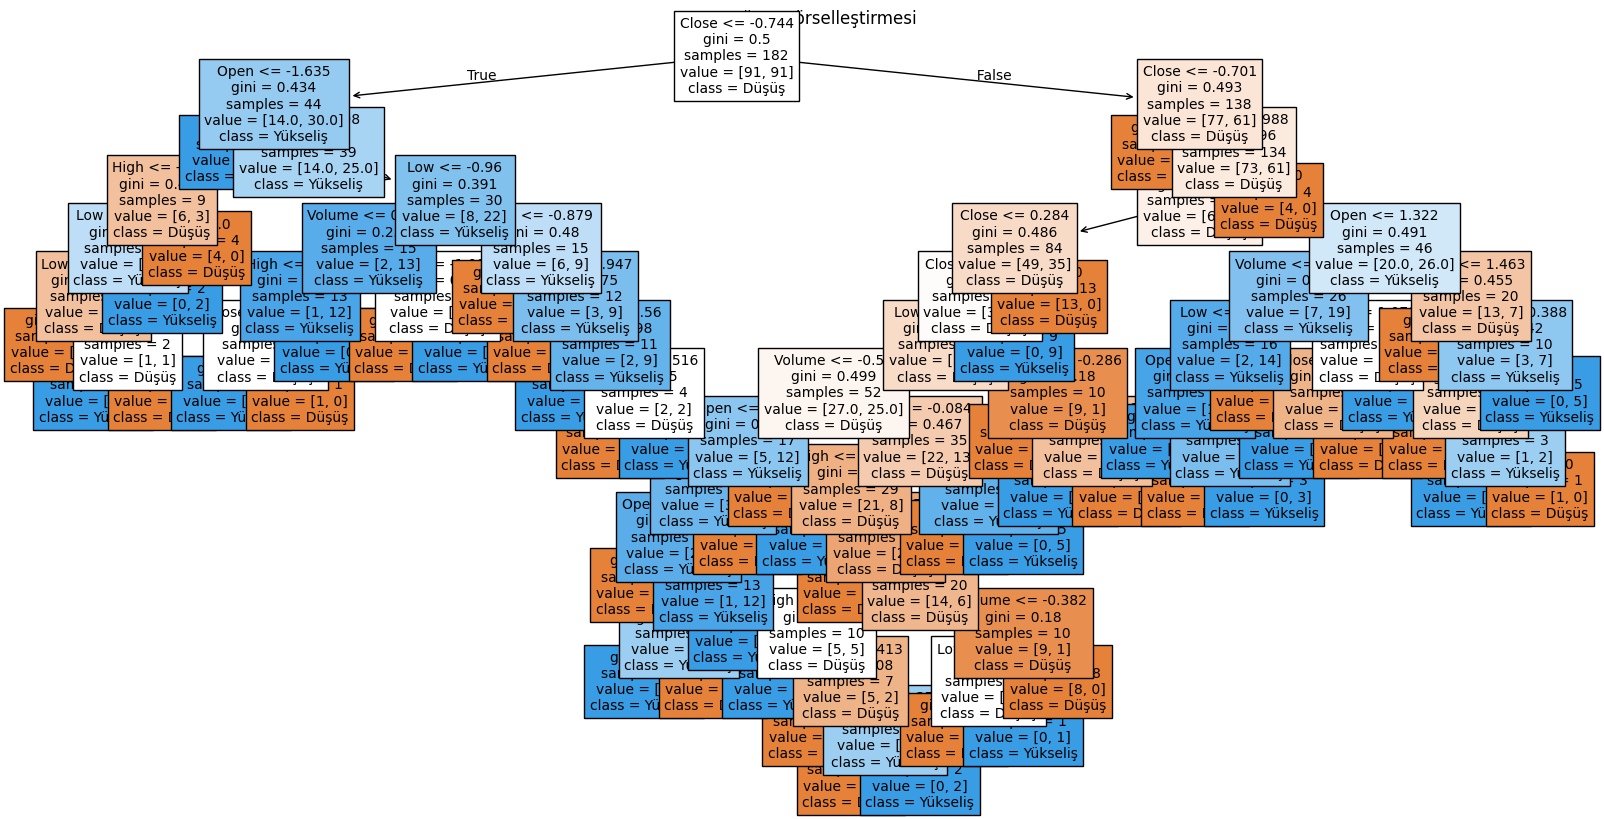

In [25]:
plt.figure(figsize=(20, 10))
# dt_model yerine models['Decision Tree'] kullanıldı
plot_tree(models['Decision Tree'], filled=True, feature_names=X.columns, class_names=['Düşüş', 'Yükseliş'], fontsize=10)
plt.title("Karar Ağacı Görselleştirmesi")
plt.show()